In [39]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
# 4.1
# Load a csv file, and clean possible data points with missing values.
df4 = pd.read_csv("Water level impact on As release.csv",
                 usecols=range(21),
                 skiprows=[1], 
                 na_values=["n.a.", "NO3-"])
df4.head(24)

,Site,Year,Month,Death,pH,T,EC*,ORP*,Water level,NH4+,...,Mg,Ca,Fe,Fe2+,Mn,NO3-,Cl,DOC,SO42-,As
0,NH03A,2013,10,10,6.7,20.8,1321,-123.9,21.41,2.1,...,38.6,164.1,22.4,14.9,38.6,0.0,25.0,31.2,0.0,22.5
1,NH03A,2013,12,10,6.6,19.1,1244,-133.5,21.16,7.4,...,33.8,174.3,25.9,21.7,33.8,0.0,42.6,5.4,4.6,59.1
2,NH03A,2014,1,10,6.9,17.5,1185,-111.1,21.09,2.5,...,39.6,188.5,17.6,7.6,39.6,0.3,30.5,7.0,4.3,17.6
3,NH03A,2014,2,10,7.1,16.8,1112,-21.2,21.66,2.5,...,42.6,196.2,0.8,0.2,42.6,0.2,26.8,17.6,4.5,2.2
4,NH03A,2014,3,10,7.2,16.9,1256,-49.4,21.67,2.4,...,38.0,186.2,3.6,2.1,38.0,0.6,28.8,2.9,4.6,3.0
5,NH03A,2014,4,10,6.9,18.7,1175,-104.6,21.97,2.4,...,39.9,162.7,11.5,11.4,39.9,0.0,29.3,7.6,0.0,10.2
6,NH03A,2014,5,10,6.9,20.3,797,-139.2,21.90,2.1,...,36.6,152.1,17.8,11.7,36.6,0.0,29.1,4.9,0.0,17.4
7,NH03A,2014,6,10,6.9,19.9,1284,-127.2,21.37,2.6,...,23.9,183.0,17.0,12.9,23.9,0.0,31.1,14.2,0.0,14.5
8,NH03A,2014,7,10,6.8,21.0,1310,-131.2,21.53,2.5,...,23.1,175.4,20.5,13.3,23.1,0.0,38.5,1.3,4.7,39.0
9,NH03A,2014,8,10,6.9,22.6,1316,-110.6,21.70,2.4,...,23.1,175.0,23.8,11.9,23.1,0.0,43.1,6.8,4.9,31.9


In [41]:
# 4.2 
# Add a new column"Time"
df4["Time"]=df4["Year"].astype(str)+"-"+df4["Month"].astype(str)
# Choose data based on "Site", and create df4_1 and df4_2 for Site NH03A and Site NH03B.
df4_1=df4.loc[df4["Site"]=="NH03A"]
df4_2=df4.loc[df4["Site"]=="NH03B"]

(0.0, 100.0)

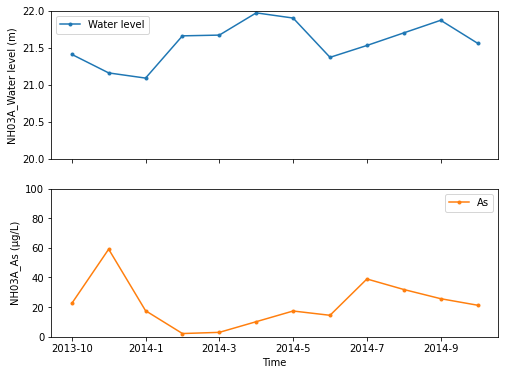

In [42]:
# 4.2 Connected above
# Set the column"Time" as the index for plotting
df4_1 = df4_1.set_index("Time")
# Choose 2 Variables("Water level"&"As")to plot the time series for Site NH03A, which is 10 meters below the ground surface.
cols_plot = ["Water level","As"]
axes = df4_1[cols_plot].plot(marker=".", linestyle="solid", figsize=(8, 6), subplots=True)
axes[0].set_ylabel("NH03A_Water level (m)")
axes[0].set_ylim(20.00,22.00)
axes[1].set_ylabel("NH03A_As (μg/L)")
axes[1].set_ylim(0,100)

(0.0, 1200.0)

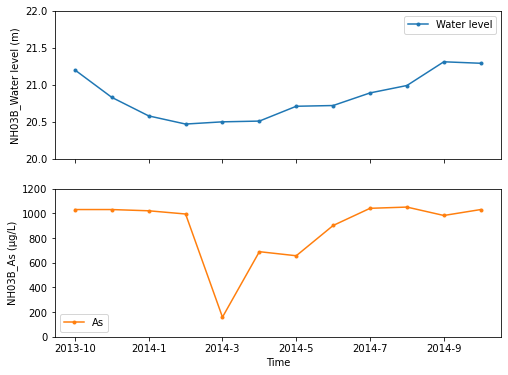

In [43]:
# 4.2 Connected above
df4_2 = df4_2.set_index("Time")
# Do the same operations for Site NH03B,which is 25 meters below the ground surface.
axes2 = df4_2[cols_plot].plot(marker=".", linestyle="solid", figsize=(8, 6), subplots=True)
axes2[0].set_ylabel("NH03B_Water level (m)")
axes2[0].set_ylim(20.00,22.00)
axes2[1].set_ylabel("NH03B_As (μg/L)")
axes2[1].set_ylim(0,1200)

In [44]:
# 4.3
# Calculate the As average of the whole Year
As_NH03A_mean=round(df4_1["As"].mean(),2)
As_NH03B_mean=round(df4_2["As"].mean(),2)
print("As_NH03A_mean is ",As_NH03A_mean,"μg/L.")
print("As_NH03B_mean is ",As_NH03B_mean,"μg/L.")
# Calculate the As average of different Seasons
As_NH03A_Spring=round(df4_1["As"][(df4_1["Month"]>=3)&(df4_1["Month"]<=5)].mean(),2)
As_NH03A_Summer=round(df4_1["As"][(df4_1["Month"]>=6)&(df4_1["Month"]<=8)].mean(),2)
As_NH03A_Fall=round(df4_1["As"][(df4_1["Month"]>=9)&(df4_1["Month"]<=11)].mean(),2)
As_NH03A_Winter=round(df4_1["As"][(df4_1["Month"]==12)|(df4_1["Month"]==1)|(df4_1["Month"]==2)].mean(),2)
print("As_NH03A_Spring:",As_NH03A_Spring,"; As_NH03A_Summer:",As_NH03A_Summer)
print("As_NH03A_Fall:",As_NH03A_Fall,"; As_NH03A_Winter:",As_NH03A_Winter)
As_NH03B_Spring=round(df4_2["As"][(df4_2["Month"]>=3)&(df4_2["Month"]<=5)].mean(),2)
As_NH03B_Summer=round(df4_2["As"][(df4_2["Month"]>=6)&(df4_2["Month"]<=8)].mean(),2)
As_NH03B_Fall=round(df4_2["As"][(df4_2["Month"]>=9)&(df4_2["Month"]<=11)].mean(),2)
As_NH03B_Winter=round(df4_2["As"][(df4_2["Month"]==12)|(df4_2["Month"]==1)|(df4_1["Month"]==2)].mean(),2)
print("As_NH03B_Spring:",As_NH03B_Spring,"; As_NH03B_Summer:",As_NH03B_Summer)
print("As_NH03B_Fall:",As_NH03B_Fall,"; As_NH03B_Winter:",As_NH03B_Winter,)
# From the output below, it is obvious that groundwater of Site NH03B(25m) has much higher As concentration than 
# that of Site NH03A(10m), related to the REDOX conditions.
# For a certain site, As concentration in Spring seems to be much lower than in the other seasons, 
# which may be attributed to the water level changes. From Figure4.2, for deeper aquifers(e.g.NH03B(25m)), 
# lower the water level is, lower the As concentration, while the shallower aqufers(e.g.NH03A(10m)) 
# reacts to the water level change more moderately.

As_NH03A_mean is  22.03 μg/L.
As_NH03B_mean is  881.75 μg/L.
As_NH03A_Spring: 10.2 ; As_NH03A_Summer: 28.47
As_NH03A_Fall: 23.17 ; As_NH03A_Winter: 26.3
As_NH03B_Spring: 501.33 ; As_NH03B_Summer: 997.0
As_NH03B_Fall: 1014.0 ; As_NH03B_Winter: 1014.67
